# Importing Dataset and Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/BADM576/Sales Transaction v.4a-1.csv")

In [3]:
df_main = df.copy()

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


# Primary Key

In [5]:
# Checking for unique values for TransactionNo, ProductNo, and CustomerNo as they are the top contenders for being the primary key
print("Unique values in TransactionNo:", df_main['TransactionNo'].nunique())
print("Unique values in ProductNo:", df_main['ProductNo'].nunique())
print("Unique values in CustomerNo:", df_main['CustomerNo'].nunique())

Unique values in TransactionNo: 23204
Unique values in ProductNo: 3768
Unique values in CustomerNo: 4738


The dataframe has 536350 entries in it and none of the top contenders have these many unique values. Hence, we'll either have to create our own primary key (using some sort of auto numbering column) or create a composite key from the already present columns. 

## Creating a Composite Key

In [6]:
# create a new column with the combined values of the columns that will form the primary key
df_main['PrimaryKey'] = df_main['TransactionNo'].astype(str) + '_' + df_main['ProductNo'].astype(str) + '_' + df_main['CustomerNo'].astype(str)

print(df_main['PrimaryKey'].nunique())

525367


As we can see that the Composite Key is also not able to create unique keys even after combining three columns. Hence we'll drop the primary key from the table and we'll use an autonumbered column as our primary key. 

In [7]:
df_main.drop(columns = ['PrimaryKey'], inplace = True)

## Creating an Autonumbered Column for PK

In [8]:
df_main.reset_index(drop=False, inplace=True)

In [9]:
df_main = df_main.rename(columns={'index': 'PrimaryKey'})

In [10]:
df_main.head()

,PrimaryKey,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


# Type of ML Problem

As the target variable is continuous in nature, it's a regression problem. We can implement the following types of regression algorithms on this data and compare which one performs the best:
1. Linear
2. Decision Tree
3. Random Forest
4. Support Vector
5. ~~Ridge~~
6. ~~Lasso~~

The use of Lasso and Ridge regression techniques depend upon the number of features and the correlation between the features. We can see that there are not many features in the dataset which suggests that these methods shouldn't be implemented, but we'll also check for correlation. If the features are highly correlated then these techniques can help us narrow out the contribution by each feature to reduce overfitting and improve the model on unseen data. 

# Correlation - Whole Dataframe

In [11]:
corr = df_main.corr()
corr

<ipython-input-11-70a6d42f3041>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_main.corr()


,PrimaryKey,Price,Quantity,CustomerNo
PrimaryKey,1.000000,0.148032,-0.000190,-0.006526
Price,0.148032,1.000000,-0.007182,-0.003198
Quantity,-0.000190,-0.007182,1.000000,-0.002232
CustomerNo,-0.006526,-0.003198,-0.002232,1.000000


We can see that there's not much correlation between the features and hence using a penalizing model won't make sense as we would like to get all the information from the all the features. Hence, we won't be utilizing Lasso and Ridge for this dataset.

# Distribution of Target Variable

In [12]:
df_main['Quantity'].describe()

count    536350.000000
mean          9.919347
std         216.662300
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

The mean of the data is 9.9 and the standard deviation is 216.66 which indicates severe right (or positives) skewness of the data. The values ranging from -80995 to 80995 indicates extreme values and a probability of presence of outliers. Let's check the presence of outliers using kdeplot and boxplot.

<Axes: xlabel='Quantity', ylabel='Density'>

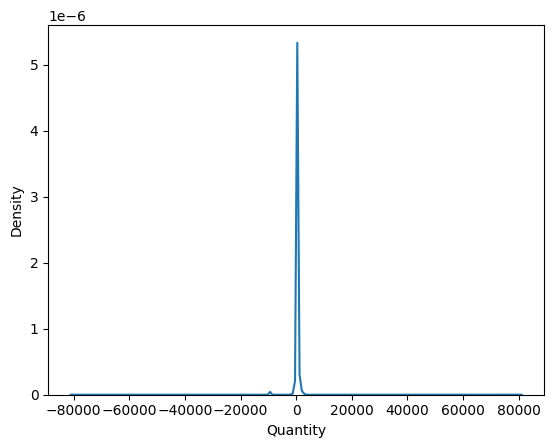

In [13]:
sns.kdeplot(df['Quantity'])

<Axes: >

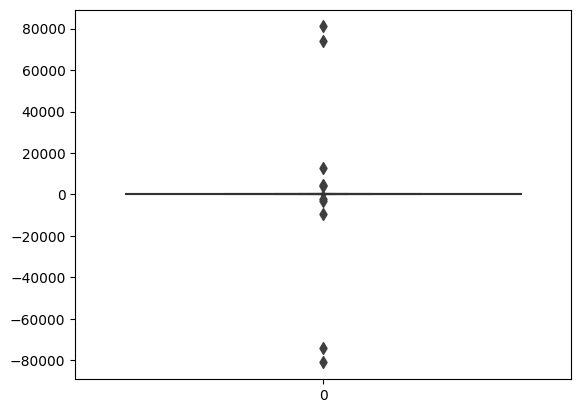

In [14]:
sns.boxenplot(df['Quantity'])

As we can see from the plots above, there are some points in the data which lie way outside the IQR ranges of the data. Hence, these will be termed as outliers. Outliers can have a negative effect on predicting the final variable especially Linear, Support Vector and to some extent Neural Network regression. Thus, these should be handled before modelling. 

# Extracting Month, Day, and Year

In [15]:
# Converting the Date column to a datetime type 
df_main['Date'] = pd.to_datetime(df_main['Date'])

# Extract the month, day, and year into separate columns
df_main['month'] = df_main['Date'].dt.month
df_main['day'] = df_main['Date'].dt.day
df_main['year'] = df_main['Date'].dt.year

In [16]:
df_main.head()

,PrimaryKey,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,month,day,year
0,0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,9,2019
1,1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,9,2019
2,2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,9,2019
3,3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,9,2019
4,4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,9,2019


# Correlation - Price and Quantity

In [17]:
cols = ['Price', 'Quantity']
corr_pr_q = df_main[cols].corr()
corr_pr_q

,Price,Quantity
Price,1.000000,-0.007182
Quantity,-0.007182,1.000000


There is a weak negative correlation between Price and Quantity, suggesting that with an increase in price, the Quantity might decrease. 

# Price Histograms

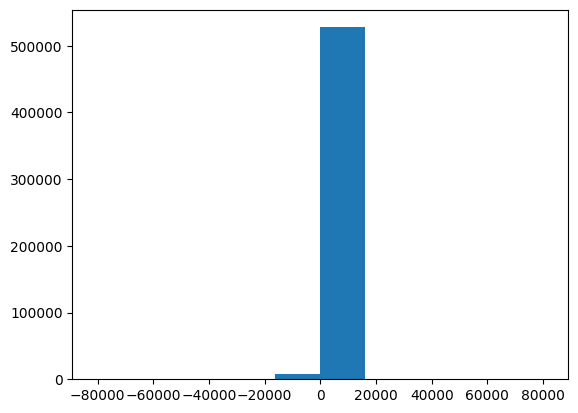

In [18]:
plt.hist(df_main['Quantity'])
plt.show()

# Numeric Variables and Target Variable Histograms

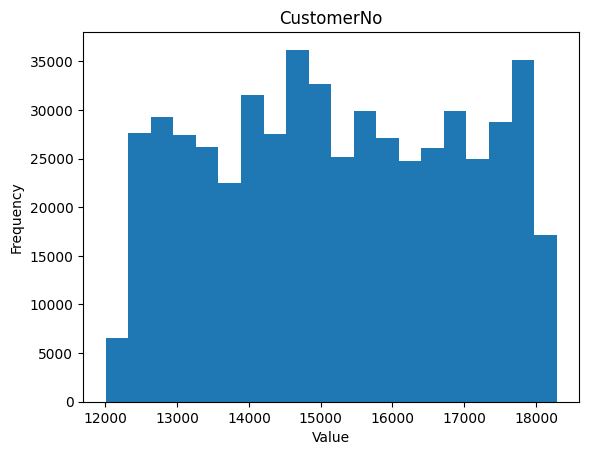

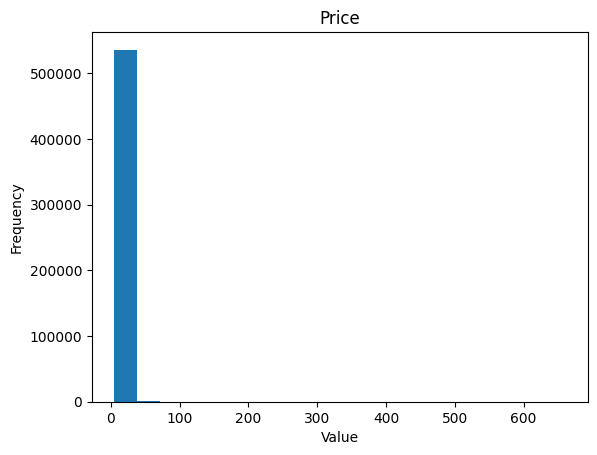

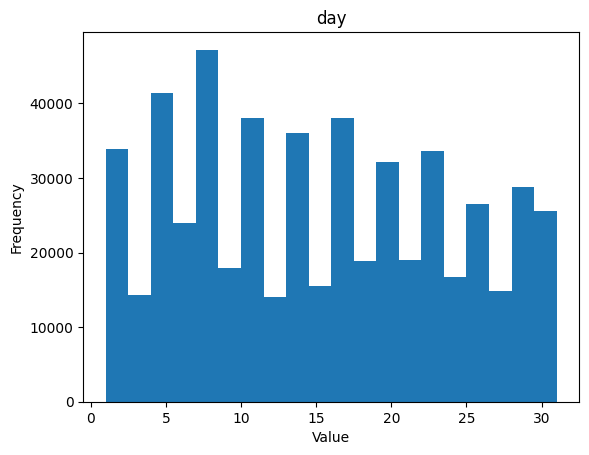

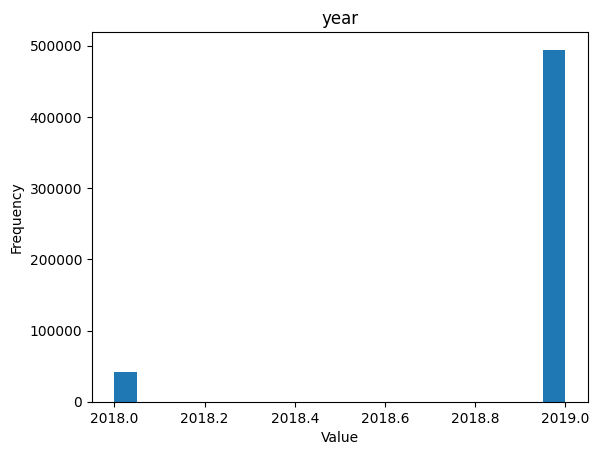

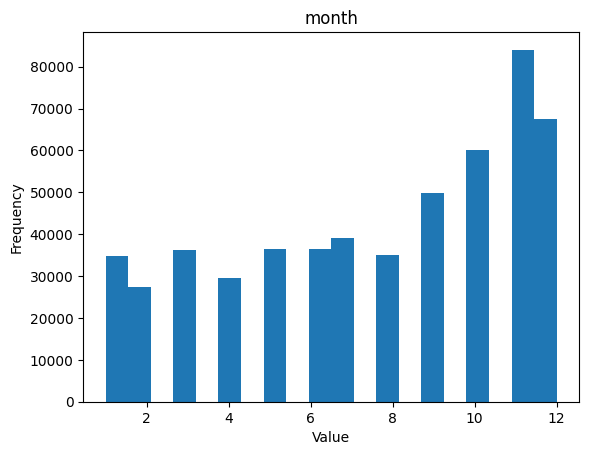

In [19]:
num_cols = ['CustomerNo', 'Price', 'day', 'year', 'month'] 
# Generate histograms for each numerical column
for col in num_cols:
    fig, ax = plt.subplots()
    ax.hist(df_main[col], bins=20)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.show()

## Interpretation 

1. Month, Day, and CustomerNo are almost Gaussian in nature. 
2. Price is right skewed whereas year is distributed majorly for only two values. 
3. In terms of outliers, Price variable has a large number of numbers.

# Log Price Distribution

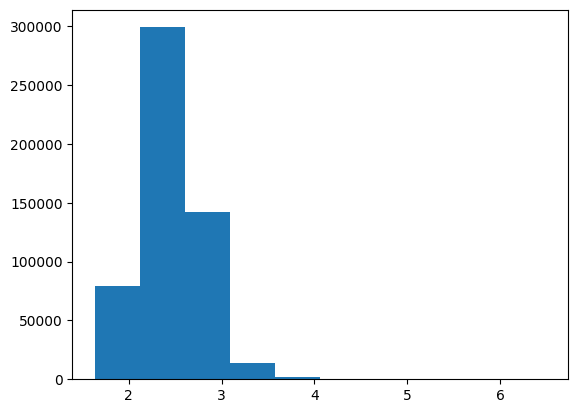

In [20]:
df['log_price'] = np.log(df['Price'])
plt.hist(df['log_price'])
plt.show()

After taking a log, the price variable has become less right skewed. 

# Target and Numeric Cols Relationship - Scatter Plots

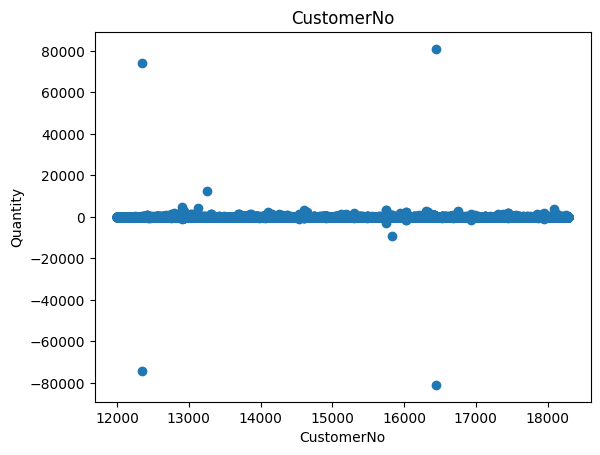

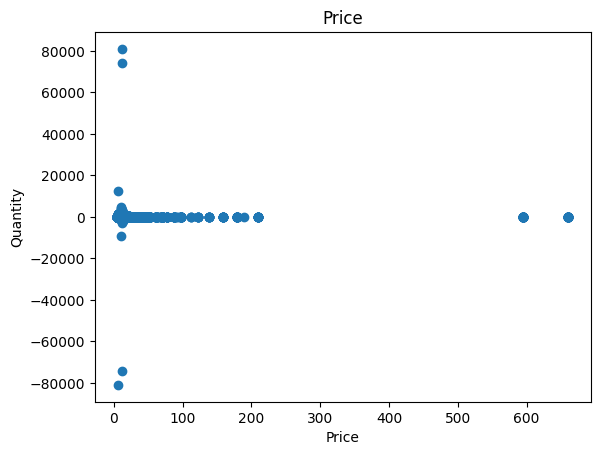

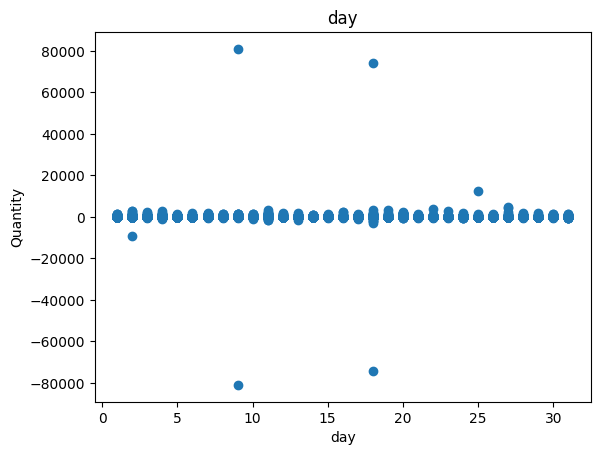

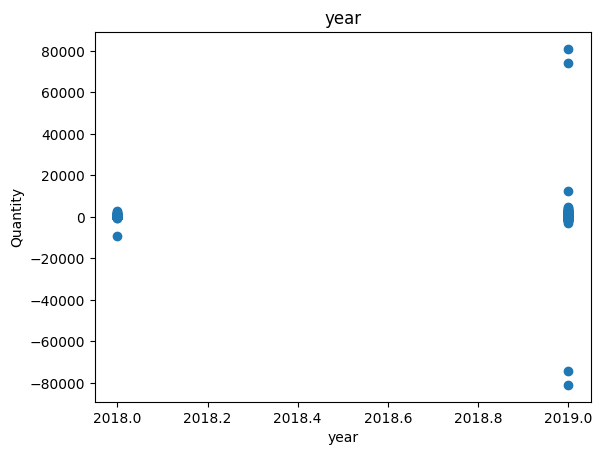

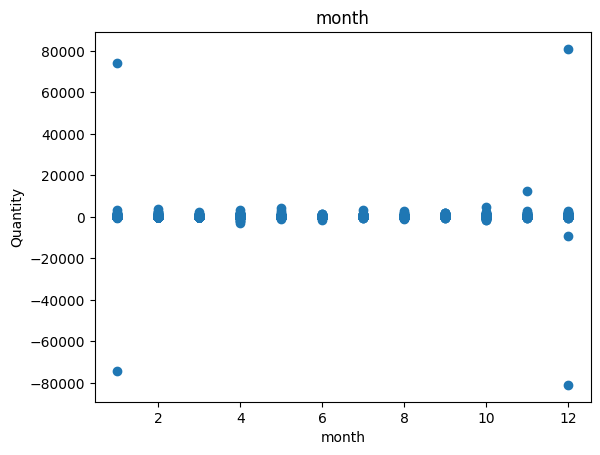

In [21]:
# Generate histograms for each numerical column
for col in num_cols:
    fig, ax = plt.subplots()
    ax.scatter(df_main[col],df_main['Quantity'])
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Quantity')
    plt.show()

1. Through the scatter plots not much can be seen as there are a lot of outliers. We need to deal with the outliers before we make any comment on the distribution of the numerical columns with respect to the target column. 

2. In **CustomerNo vs Quantity**, we can see that the outliers are present for Quantity and not for CustomerNo (as it's an identification for the customer hence presence of an outlier is not expected and not seen as well).

3. In **Price vs Quantity**, we can see that there are outliers present for both the variables. As we've already talked about Quantity before, in Price we can see that there two datapoints outside the norm and these should be treated.

4. In **Day vs Quantity**, we can see that there are some days such as 18, 9, 25, and 2 which have outliers present in terms of Quantity.

5. In **Year vs Quantity**, we can see that the outliers present for the Quantity variable are present for the year 2019 more as compared to 2018. For the Year column the values are distributed only for two years and no outliers are present. 

6. In **Month vs Quantity**, there are some months in which the Quantity is high and we need to deal with these months later on. If we deal with the outliers of Quantity, we'll be able to get rid of this problem. 

# Cardinality, Rare Categories, and Ordinality

In [22]:
df_main['Country'].value_counts()

United Kingdom          485095
Germany                  10675
France                   10526
EIRE                      8048
Belgium                   2539
Spain                     2430
Switzerland               2336
Netherlands               2330
Portugal                  1848
Australia                 1704
Norway                     938
Austria                    887
Iceland                    787
Finland                    692
Italy                      661
Channel Islands            629
Cyprus                     582
Unspecified                447
Sweden                     417
Denmark                    416
USA                        379
Japan                      371
Israel                     358
Singapore                  215
Poland                     174
Hong Kong                  153
Canada                     150
Malta                      149
Greece                      67
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon 

<Axes: xlabel='count', ylabel='Country'>

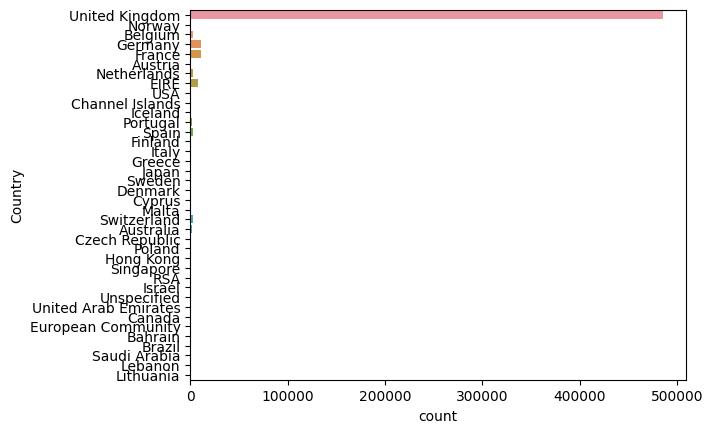

In [23]:
sns.countplot(y='Country',data=df_main)

We can see that United Kingdom has the highest cardinality amongst all the countries. 

In [24]:
# Calculate the percentage of observations for each label in the 'ProductName' column
label_counts_country = df['Country'].value_counts(normalize=True) * 100

# Set the threshold for rare categories as 0.01%
threshold = 0.01

# Filter out the labels that have a percentage below the threshold
rare_labels_country = label_counts_country[label_counts_country < threshold].index

# Print the number of rare labels in the dataset
print(f"There are {len(rare_labels_country)} rare labels in the Country column.")

There are 6 rare labels in the Country column.


In [25]:
label_counts_country

United Kingdom          90.443740
Germany                  1.990305
France                   1.962524
EIRE                     1.500513
Belgium                  0.473385
Spain                    0.453062
Switzerland              0.435536
Netherlands              0.434418
Portugal                 0.344551
Australia                0.317703
Norway                   0.174886
Austria                  0.165377
Iceland                  0.146733
Finland                  0.129020
Italy                    0.123240
Channel Islands          0.117274
Cyprus                   0.108511
Unspecified              0.083341
Sweden                   0.077748
Denmark                  0.077561
USA                      0.070663
Japan                    0.069171
Israel                   0.066747
Singapore                0.040086
Poland                   0.032442
Hong Kong                0.028526
Canada                   0.027967
Malta                    0.027780
Greece                   0.012492
United Arab Em

Depending on the business problem, we can say that the countries under 100 value counts (or under 0.01% rare label counts) can be considered rare categories. In some other case we can also say that countries with the label count of less than 0.1% can be considered as rare categories and can be combined. It really depends on how much information we're willing to lose. We should strike a balance between reducing complexity and retaining information when it comes to combining rare categories. 

In [26]:
df_main['ProductName'].value_counts()

Cream Hanging Heart T-Light Holder    2378
Regency Cakestand 3 Tier              2200
Jumbo Bag Red Retrospot               2159
Party Bunting                         1727
Lunch Bag Red Retrospot               1639
                                      ... 
Cat With Sunglasses Blank Card           1
Letter "U" Bling Key Ring                1
Ocean Stripe Hammock                     1
Incense Bazaar Peach                     1
Porcelain Hanging Bell Small             1
Name: ProductName, Length: 3768, dtype: int64

In [27]:
# Calculate the percentage of observations for each label in the 'ProductName' column
label_counts_pn = df['ProductName'].value_counts(normalize=True) * 100

# Set the threshold for rare categories as 0.01%
threshold = 0.01

# Filter out the labels that have a percentage below the threshold
rare_labels = label_counts_pn[label_counts_pn < threshold].index

# Print the number of rare labels in the dataset
print(f"There are {len(rare_labels)} rare labels in the ProductName column.")

There are 1648 rare labels in the ProductName column.


In [28]:
label_counts_pn

Cream Hanging Heart T-Light Holder    0.443367
Regency Cakestand 3 Tier              0.410180
Jumbo Bag Red Retrospot               0.402536
Party Bunting                         0.321991
Lunch Bag Red Retrospot               0.305584
                                        ...   
Cat With Sunglasses Blank Card        0.000186
Letter "U" Bling Key Ring             0.000186
Ocean Stripe Hammock                  0.000186
Incense Bazaar Peach                  0.000186
Porcelain Hanging Bell Small          0.000186
Name: ProductName, Length: 3768, dtype: float64

We can see here that most of the categories in the ProductName column appear is very less datapoints (which can be seen through the percentage label counts), hence we should set the threshold value for combining rare categories accordingly (thus we chose 0.01%).

For both Country and ProductName column, they are nominal in nature as they both don't have an inherent ordering attached to their name. 

# Feature Engineering

In [29]:
df_main['ProductNameLen']=df_main['ProductName'].apply(lambda i: len(i))
df_main['ProductNameNumWords']=df_main['ProductName'].apply(lambda i: len(i.split()))

In [30]:
df_main.head()

,PrimaryKey,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,month,day,year,ProductNameLen,ProductNameNumWords
0,0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,9,2019,29,6
1,1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,9,2019,35,5
2,2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,9,2019,24,4
3,3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,9,2019,33,5
4,4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,9,2019,33,7


# Dealing with NAs

In [31]:
df_main.isna().sum()

PrimaryKey              0
TransactionNo           0
Date                    0
ProductNo               0
ProductName             0
Price                   0
Quantity                0
CustomerNo             55
Country                 0
month                   0
day                     0
year                    0
ProductNameLen          0
ProductNameNumWords     0
dtype: int64

As there are only 55 entries in CustomerNo out of 536350, we should drop all these rows as it would not lead to a large amount of information loss. 

In [32]:
df_wo_na = df_main.dropna(subset = ['CustomerNo'])

In [33]:
df_wo_na.isna().sum()

PrimaryKey             0
TransactionNo          0
Date                   0
ProductNo              0
ProductName            0
Price                  0
Quantity               0
CustomerNo             0
Country                0
month                  0
day                    0
year                   0
ProductNameLen         0
ProductNameNumWords    0
dtype: int64

# Deal with Outliers

In [34]:
df_wo_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PrimaryKey           536295 non-null  int64         
 1   TransactionNo        536295 non-null  object        
 2   Date                 536295 non-null  datetime64[ns]
 3   ProductNo            536295 non-null  object        
 4   ProductName          536295 non-null  object        
 5   Price                536295 non-null  float64       
 6   Quantity             536295 non-null  int64         
 7   CustomerNo           536295 non-null  float64       
 8   Country              536295 non-null  object        
 9   month                536295 non-null  int64         
 10  day                  536295 non-null  int64         
 11  year                 536295 non-null  int64         
 12  ProductNameLen       536295 non-null  int64         
 13  ProductNameNum

In [35]:
import copy

df_wo_na_copy = copy.deepcopy(df_wo_na)

In [36]:
from scipy.stats.mstats import winsorize

# Winsorize the Quantity column at 5% level
df_wo_na_copy['Quantity'] = winsorize(df_wo_na['Quantity'], limits=[0.05, 0.05])

<Axes: >

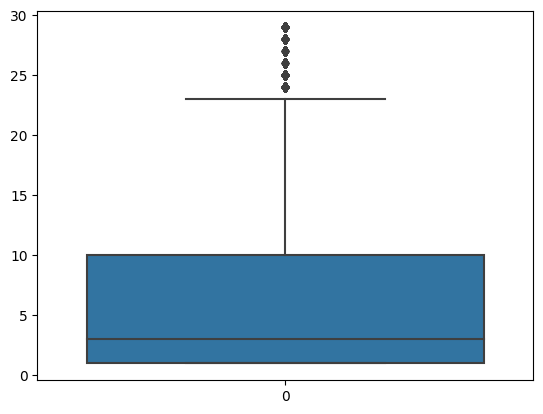

In [37]:
sns.boxplot(df_wo_na_copy['Quantity'])

<Axes: xlabel='Quantity', ylabel='Density'>

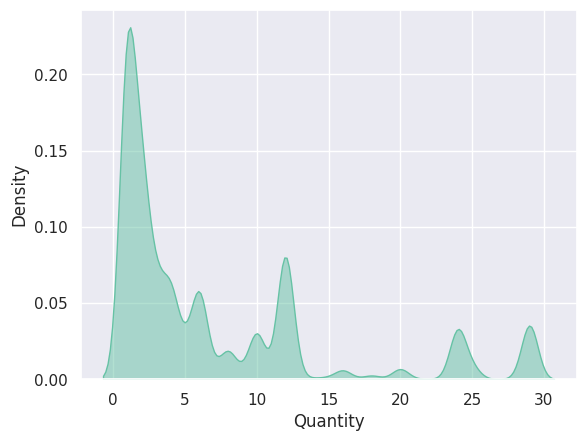

In [38]:
sns.set(style="darkgrid", palette="Set2")
sns.kdeplot(df_wo_na_copy['Quantity'], fill = True, alpha = 0.5)

In [39]:
df_wo_na_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PrimaryKey           536295 non-null  int64         
 1   TransactionNo        536295 non-null  object        
 2   Date                 536295 non-null  datetime64[ns]
 3   ProductNo            536295 non-null  object        
 4   ProductName          536295 non-null  object        
 5   Price                536295 non-null  float64       
 6   Quantity             536295 non-null  int64         
 7   CustomerNo           536295 non-null  float64       
 8   Country              536295 non-null  object        
 9   month                536295 non-null  int64         
 10  day                  536295 non-null  int64         
 11  year                 536295 non-null  int64         
 12  ProductNameLen       536295 non-null  int64         
 13  ProductNameNum

# Modeling

In [40]:
df_wo_na_copy.drop(columns = ['PrimaryKey'], inplace = True)

In [41]:
df_wo_na_copy.drop(columns = ['Date'], inplace = True)

In [42]:
df_wo_na_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionNo        536295 non-null  object 
 1   ProductNo            536295 non-null  object 
 2   ProductName          536295 non-null  object 
 3   Price                536295 non-null  float64
 4   Quantity             536295 non-null  int64  
 5   CustomerNo           536295 non-null  float64
 6   Country              536295 non-null  object 
 7   month                536295 non-null  int64  
 8   day                  536295 non-null  int64  
 9   year                 536295 non-null  int64  
 10  ProductNameLen       536295 non-null  int64  
 11  ProductNameNumWords  536295 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 69.3+ MB


In [43]:
df_wo_na_copy['CustomerNo'] = df_wo_na_copy['CustomerNo'].astype('object')

In [44]:
df_wo_na_copy['month'] = df_wo_na_copy['month'].astype('object')

In [45]:
df_wo_na_copy['day'] = df_wo_na_copy['day'].astype('object')

In [46]:
df_wo_na_copy['year'] = df_wo_na_copy['year'].astype('object')

In [47]:
df_wo_na_copy.columns

Index(['TransactionNo', 'ProductNo', 'ProductName', 'Price', 'Quantity',
       'CustomerNo', 'Country', 'month', 'day', 'year', 'ProductNameLen',
       'ProductNameNumWords'],
      dtype='object')

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_wo_na_copy.drop('Quantity', axis=1), df_wo_na_copy['Quantity'], test_size=0.3, random_state=42)

# Define the categorical columns
cat_cols = ['TransactionNo', 'ProductNo', 'ProductName', 'CustomerNo', 'Country', 'day', 'year', 'month']

# Define the numerical columns
num_cols = ['Price', 'ProductNameLen', 'ProductNameNumWords']

# Create the preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)],
    remainder='passthrough')

# Fit and transform the preprocessing pipeline on the training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

# Transform the testing data using the fitted preprocessing pipeline
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Define the models to be used
models = [LinearRegression(), DecisionTreeRegressor()]

# Train and evaluate the models
for model in models:
    model.fit(X_train_preprocessed, y_train)
    print(f"{type(model).__name__} Train Score: {model.score(X_train_preprocessed, y_train)}")
    print(f"{type(model).__name__} Test Score: {model.score(X_test_preprocessed, y_test)}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


LinearRegression Train Score: 0.7178473284715428
LinearRegression Test Score: 0.6576714014023923

DecisionTreeRegressor Train Score: 0.9987272845981524
DecisionTreeRegressor Test Score: 0.49657034872626027



LinearRegression model performs better on the test set than the DecisionTreeRegressor model. The LinearRegression model has a test score of 0.6576714014023923 while the DecisionTreeRegressor model has a test score of 0.49657034872626027. However, the DecisionTreeRegressor model has a much higher train score of 0.9987272845981524, which could suggest overfitting.